In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import *
from tqdm.auto import tqdm
import os
from constants import *

In [3]:
data = pd.read_csv(f"{RAW_DATA_PATH}/summary_v_1_5.csv")
data

/share/galaxy/nattawin/conda/envs/SynProtX/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,7,19,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name
0,518700,KIN001-055,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,0.881484,0.0,...,-1.3835,-2.767,0.0,0.0,0.0,0.0,0,0,\N,\N
1,521155,56990-57-9,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,0.135146,0.0,...,1.6760,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
2,521217,AR-42,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,2.383739,0.0,...,1.3250,0.000,0.0,0.0,0.0,0.0,1,0,Histone deacetylase,\N
3,527158,QL-X-138,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,10.240000,0.0,...,2.3020,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
4,527253,Belinostat,NaN,SW13,GDSC1,adrenal_gland,uM,NaN,19.134169,0.0,...,3.1075,0.000,0.0,0.0,0.0,0.0,4,0,Histone deacetylase; Histone deacetylase 1; Hi...,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432346,697645,Tanespimycin,NaN,SW962,GDSC1,vulva,uM,NaN,0.009633,0.0,...,26.9000,0.000,0.0,0.0,0.0,0.0,3,0,Heat shock protein HSP 90-alpha; Heat shock pr...,\N
1432347,701108,azanide; dichloroplatinum(2+),NaN,SW962,GDSC1,vulva,uM,NaN,0.352063,0.0,...,4.2630,0.000,0.0,0.0,0.0,0.0,0,0,\N,\N
1432348,701796,rTRAIL,NaN,SW962,GDSC1,vulva,uM,NaN,0.004242,0.0,...,-5.0560,-10.112,0.0,0.0,0.0,0.0,0,0,\N,\N
1432349,702524,Nilotinib,NaN,SW962,GDSC1,vulva,uM,NaN,0.048311,0.0,...,-9.3305,-18.661,0.0,0.0,0.0,0.0,4,0,Carbonic anhydrase I; Carbonic anhydrase II; C...,\N


In [4]:
df = data.copy()
df = df.drop(df[df["drug_row"] == "\\N"].index)
df = df.drop(df[df["drug_col"] == "\\N"].index)
df = df.drop(df[df["cell_line_name"] == "\\N"].index)
df = df.drop(df[df["synergy_loewe"] == "\\N"].index)
df = df.drop(df[df["synergy_zip"] == "\\N"].index)
df = df.drop(df[df["synergy_hsa"] == "\\N"].index)
df = df.drop(df[df["synergy_bliss"] == "\\N"].index)
df = df.drop(df[df["tissue_name"] == "\\N"].index)
df = df.drop(df[df["ic50_row"] == "\\N"].index)
df = df.drop(df[df["ic50_col"] == "\\N"].index)
df = df.drop(df[df["ic50_row"] == 0].index)
df = df.drop(df[df["ic50_col"] == 0].index)
df = df.drop(df[df["css_ri"] == "\\N"].index)
df = df.drop(df[df["synergy_loewe"] == "\\N"].index)
df

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name
19037,452434,lonidamine,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,7.604007e-02,4.496970,...,39.0610,24.9095,0.409635,-11.702283,-1.252282,-1.212833,3,0,Beta-lactamase AmpC,Focal adhesion kinase 1; Protein tyrosine kina...
19038,452435,Ethyl bromopyruvate,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,4.000000e+00,3.605996,...,23.6110,12.3940,-3.977257,-16.18512,-12.449563,-11.356646,0,0,\N,Focal adhesion kinase 1; Protein tyrosine kina...
19039,452436,Tranilast (trans-),717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,1.437738e-02,2.802769,...,16.2610,5.5935,0.117053,-16.588246,-4.052052,-1.243804,0,0,\N,Focal adhesion kinase 1; Protein tyrosine kina...
19040,452437,Lenalidomide,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,7.631303e-09,3.926323,...,27.8965,13.9555,2.606357,-10.877569,0.456392,3.936726,4,0,Cereblon/Aiolos; Cereblon/Ikaros; CRL4(CRBN) E...,Focal adhesion kinase 1; Protein tyrosine kina...
19041,452438,Pomalidomide,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,uM,uM,2.074997e+00,3.428020,...,29.2920,20.9890,2.674166,-1.901326,3.045460,5.292969,4,0,Cereblon/Aiolos; Cereblon/Ikaros; CRL4(CRBN) E...,Focal adhesion kinase 1; Protein tyrosine kina...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431628,1197317,AZD4547,Carfilzomib,SW780FGF,ASTRAZENECA,urinary_tract,uM,uM,3.000000e+00,0.010080,...,30.5715,12.1875,-3.500767,-1.732535,1.567371,-3.539042,3,4,Fibroblast growth factor receptor 3; Fibroblas...,Proteasome subunit beta type-8; 26S proteasome...
1431629,1197428,AZD4547,Cediranib,SW780FGF,ASTRAZENECA,urinary_tract,uM,uM,1.168609e+00,0.871137,...,29.1820,28.4455,1.971150,1.867163,5.251662,4.061791,3,3,Fibroblast growth factor receptor 3; Fibroblas...,Vascular endothelial growth factor receptor 2;...
1431630,1197492,AZD4547,AZ13401366,SW780FGF,ASTRAZENECA,urinary_tract,uM,uM,1.802866e+00,1.195275,...,48.2525,44.9730,19.276304,11.575918,16.003936,21.509903,3,\N,Fibroblast growth factor receptor 3; Fibroblas...,\N
1431631,1198955,AZD5582,TNF-Alpha,SW780FGF,ASTRAZENECA,urinary_tract,uM,uM,6.355483e-02,0.000388,...,6.4540,1.6725,-3.158395,3.923324,4.500456,-3.339732,0,\N,Inhibitor of apoptosis protein 3; Baculoviral ...,\N


In [5]:
df["ic50_row"].value_counts()

10.000000    22083
1.000000     20479
5.000000     15900
2.000000     11970
4.000000      8853
             ...  
0.099262         1
0.356079         1
2.492389         1
0.598254         1
0.022017         1
Name: ic50_row, Length: 362656, dtype: int64

In [6]:
df["synergy_loewe"] = df["synergy_loewe"].astype(float)
df["ic50_row"] = df["ic50_row"].astype(float)

In [7]:
df = df.groupby(
    ["drug_row", "drug_col", "cell_line_name", "study_name", "tissue_name"],
    as_index=False,
).mean()
df = df.loc[
    :,
    [
        "drug_row",
        "drug_col",
        "cell_line_name",
        "study_name",
        "tissue_name",
        "ic50_row",
        "ic50_col",
        "ri_row",
        "ri_col",
        "css_row",
        "css_col",
        "css_ri",
        "S_sum",
        "S_mean",
        "S_max",
        "synergy_zip",
        "synergy_loewe",
        "synergy_hsa",
        "synergy_bliss",
    ],
]
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,0.000022,0.000200,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680
1,(+)-Blebbistatin,1268524-70-4,TMD8,MATHEWS,haematopoietic_and_lymphoid,0.014046,0.222953,-20.043000,25.595000,4.855000,9.649000,7.252000,1.700000,4.476000,-18.343000,8.411021,-44.555935,-11.800141,2.454914
2,(+)-Blebbistatin,Ibrutinib,TMD8,MATHEWS,haematopoietic_and_lymphoid,2.500000,0.003975,-9.776000,29.111000,46.208000,38.715000,42.461500,23.126500,32.794000,13.350500,12.485505,-37.189720,4.264250,11.810672
3,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,0.000022,0.000200,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567
4,(+)-Usnic acid,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,0.353523,3.231721,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650848,zonisamide,trifluoperazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,0.000119,0.000003,18.700184,19.589164,9.591595,9.591595,9.591595,-28.697753,-9.553079,-9.997569,-25.034543,-10.017628,-9.997569,-25.034543
650849,zonisamide,triflupromazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,0.000119,0.000012,18.700184,22.609164,29.161595,29.161595,29.161595,-12.147753,8.506921,6.552431,-7.919797,6.530700,6.552431,-7.919797
650850,zonisamide,trimethobenzamide,KBM-7,CLOUD,haematopoietic_and_lymphoid,0.000119,0.000051,18.700184,36.179164,42.301595,42.301595,42.301595,-12.577753,14.861921,6.122431,-5.812183,6.099381,6.122431,-5.812183
650851,zonisamide,vinblastine,KBM-7,CLOUD,haematopoietic_and_lymphoid,0.000119,0.000003,18.700184,96.809164,92.621595,92.621595,92.621595,-22.887753,34.866921,-4.187569,-4.784261,-4.284099,-4.187569,-4.784261


In [8]:
df["ic50_row"] = -np.log10((df["ic50_row"]) / 1000000)
df["ic50_col"] = -np.log10((df["ic50_col"]) / 1000000)

(array([  175.,   266.,   457.,   689.,  1188.,  2036.,  3938.,  7772.,
        18695., 45652., 65168., 66777., 63453., 55043., 47632., 41805.,
        37677., 34282., 30047., 26299., 22995., 18740., 15140., 11917.,
         9109.,  6282.,  4426.,  2920.,  2463.,  3978.]),
 array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
          5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
         60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 30 artists>)

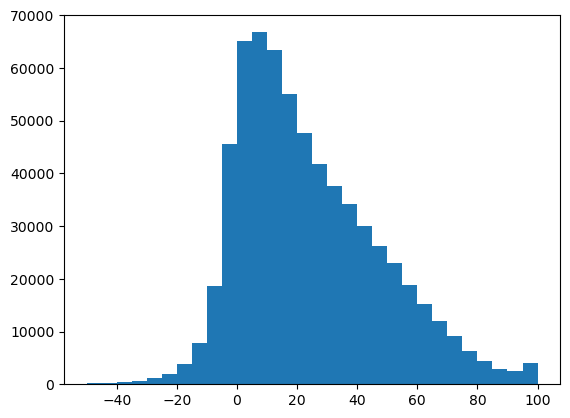

In [9]:
plt.hist(df["css_ri"], range=[-50, 100], bins=30)

(array([   884.,   1206.,   1604.,   1757.,   2269.,   3044.,   4087.,
          5589.,   7656.,   9965.,  13702.,  18213.,  24628.,  33121.,
         45971.,  66328.,  92391., 125756.,  90089.,  43688.,  22798.,
         12788.,   7451.,   4409.,   2919.,   1879.,   1225.,    865.,
           578.,    408.]),
 array([-75.        , -70.83333333, -66.66666667, -62.5       ,
        -58.33333333, -54.16666667, -50.        , -45.83333333,
        -41.66666667, -37.5       , -33.33333333, -29.16666667,
        -25.        , -20.83333333, -16.66666667, -12.5       ,
         -8.33333333,  -4.16666667,   0.        ,   4.16666667,
          8.33333333,  12.5       ,  16.66666667,  20.83333333,
         25.        ,  29.16666667,  33.33333333,  37.5       ,
         41.66666667,  45.83333333,  50.        ]),
 <BarContainer object of 30 artists>)

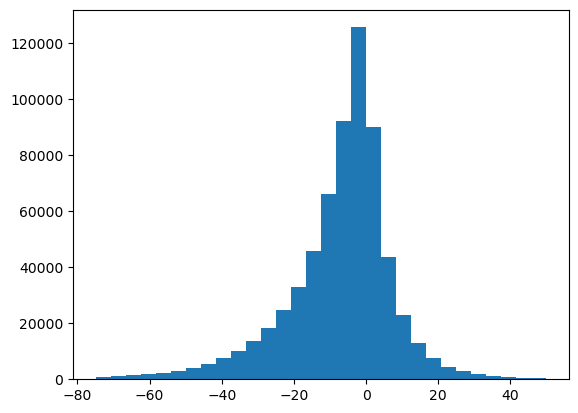

In [10]:
plt.hist(df["synergy_loewe"], bins=30, range=[-75, 50])

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.18000e+02, 5.41000e+02, 1.89830e+04, 3.51190e+04,
        9.96410e+04, 1.05205e+05, 1.08590e+05, 6.23350e+04, 6.69190e+04,
        4.26780e+04, 2.92570e+04, 1.89940e+04, 9.59100e+03, 8.77900e+03,
        1.46750e+04, 1.58050e+04, 6.19600e+03, 3.80700e+03, 6.54000e+02,
        9.70000e+02, 1.13000e+03, 3.68000e+02, 5.80000e+01, 3.80000e+01]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

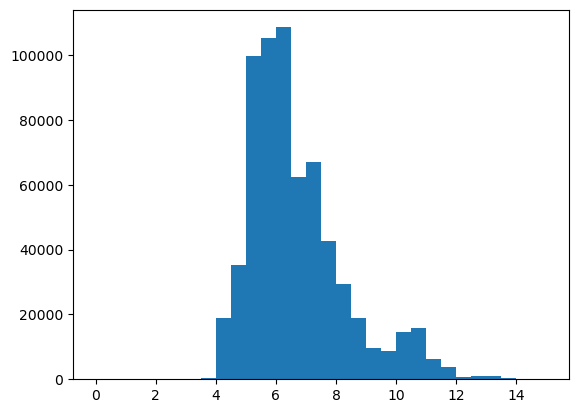

In [11]:
plt.hist(df["ic50_row"], range=[0, 15], bins=30)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 9.05000e+02, 2.81100e+04, 2.86610e+04,
        1.19897e+05, 1.00347e+05, 9.34470e+04, 6.34310e+04, 6.07980e+04,
        4.20500e+04, 3.23370e+04, 1.93630e+04, 9.89000e+03, 1.16850e+04,
        1.65690e+04, 1.11750e+04, 5.55500e+03, 3.00200e+03, 9.10000e+02,
        1.00200e+03, 8.97000e+02, 3.55000e+02, 8.40000e+01, 2.00000e+01]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

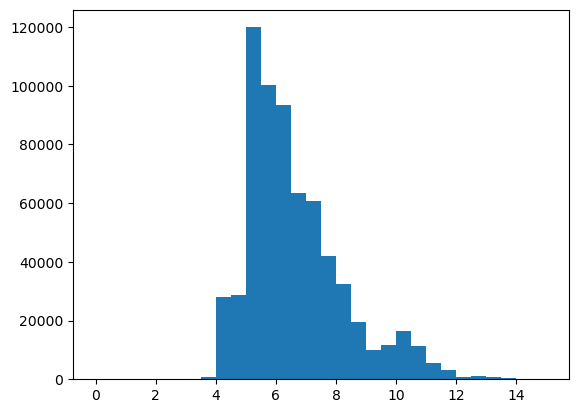

In [12]:
plt.hist(df["ic50_col"], range=[0, 15], bins=30)

In [13]:
df = df.drop(df[df["synergy_loewe"] <= -75].index)
df = df.drop(df[df["synergy_loewe"] >= 50].index)
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680
1,(+)-Blebbistatin,1268524-70-4,TMD8,MATHEWS,haematopoietic_and_lymphoid,7.852434,6.651786,-20.043000,25.595000,4.855000,9.649000,7.252000,1.700000,4.476000,-18.343000,8.411021,-44.555935,-11.800141,2.454914
2,(+)-Blebbistatin,Ibrutinib,TMD8,MATHEWS,haematopoietic_and_lymphoid,5.602060,8.400635,-9.776000,29.111000,46.208000,38.715000,42.461500,23.126500,32.794000,13.350500,12.485505,-37.189720,4.264250,11.810672
3,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567
4,(+)-Usnic acid,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,6.451582,5.490566,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650848,zonisamide,trifluoperazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,11.500000,18.700184,19.589164,9.591595,9.591595,9.591595,-28.697753,-9.553079,-9.997569,-25.034543,-10.017628,-9.997569,-25.034543
650849,zonisamide,triflupromazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,10.926936,18.700184,22.609164,29.161595,29.161595,29.161595,-12.147753,8.506921,6.552431,-7.919797,6.530700,6.552431,-7.919797
650850,zonisamide,trimethobenzamide,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,10.295033,18.700184,36.179164,42.301595,42.301595,42.301595,-12.577753,14.861921,6.122431,-5.812183,6.099381,6.122431,-5.812183
650851,zonisamide,vinblastine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,11.460409,18.700184,96.809164,92.621595,92.621595,92.621595,-22.887753,34.866921,-4.187569,-4.784261,-4.284099,-4.187569,-4.784261


In [14]:
df = df.drop(df[df["css_ri"] <= -50].index)
df = df.drop(df[df["css_ri"] >= 100].index)
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680
1,(+)-Blebbistatin,1268524-70-4,TMD8,MATHEWS,haematopoietic_and_lymphoid,7.852434,6.651786,-20.043000,25.595000,4.855000,9.649000,7.252000,1.700000,4.476000,-18.343000,8.411021,-44.555935,-11.800141,2.454914
2,(+)-Blebbistatin,Ibrutinib,TMD8,MATHEWS,haematopoietic_and_lymphoid,5.602060,8.400635,-9.776000,29.111000,46.208000,38.715000,42.461500,23.126500,32.794000,13.350500,12.485505,-37.189720,4.264250,11.810672
3,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567
4,(+)-Usnic acid,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,6.451582,5.490566,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650848,zonisamide,trifluoperazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,11.500000,18.700184,19.589164,9.591595,9.591595,9.591595,-28.697753,-9.553079,-9.997569,-25.034543,-10.017628,-9.997569,-25.034543
650849,zonisamide,triflupromazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,10.926936,18.700184,22.609164,29.161595,29.161595,29.161595,-12.147753,8.506921,6.552431,-7.919797,6.530700,6.552431,-7.919797
650850,zonisamide,trimethobenzamide,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,10.295033,18.700184,36.179164,42.301595,42.301595,42.301595,-12.577753,14.861921,6.122431,-5.812183,6.099381,6.122431,-5.812183
650851,zonisamide,vinblastine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,11.460409,18.700184,96.809164,92.621595,92.621595,92.621595,-22.887753,34.866921,-4.187569,-4.784261,-4.284099,-4.187569,-4.784261


In [15]:
df[df["ic50_row"] > 15]["ic50_row"].value_counts().sum()

401

In [16]:
df = df.drop(df[df["ic50_row"] > 15].index)
df = df.drop(df[df["ic50_col"] > 15].index)
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,css_col,css_ri,S_sum,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,21.829123,21.829123,25.515933,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680
1,(+)-Blebbistatin,1268524-70-4,TMD8,MATHEWS,haematopoietic_and_lymphoid,7.852434,6.651786,-20.043000,25.595000,4.855000,9.649000,7.252000,1.700000,4.476000,-18.343000,8.411021,-44.555935,-11.800141,2.454914
2,(+)-Blebbistatin,Ibrutinib,TMD8,MATHEWS,haematopoietic_and_lymphoid,5.602060,8.400635,-9.776000,29.111000,46.208000,38.715000,42.461500,23.126500,32.794000,13.350500,12.485505,-37.189720,4.264250,11.810672
3,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,28.148221,28.148221,14.807248,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567
4,(+)-Usnic acid,717906-29-1,A-673,NCATS_ES(FAKI/AURKI),bone,6.451582,5.490566,1.966000,25.537000,58.898000,30.432000,44.665000,17.162000,30.913500,19.128000,1.669779,-8.644502,1.940383,2.191848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650848,zonisamide,trifluoperazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,11.500000,18.700184,19.589164,9.591595,9.591595,9.591595,-28.697753,-9.553079,-9.997569,-25.034543,-10.017628,-9.997569,-25.034543
650849,zonisamide,triflupromazine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,10.926936,18.700184,22.609164,29.161595,29.161595,29.161595,-12.147753,8.506921,6.552431,-7.919797,6.530700,6.552431,-7.919797
650850,zonisamide,trimethobenzamide,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,10.295033,18.700184,36.179164,42.301595,42.301595,42.301595,-12.577753,14.861921,6.122431,-5.812183,6.099381,6.122431,-5.812183
650851,zonisamide,vinblastine,KBM-7,CLOUD,haematopoietic_and_lymphoid,9.924775,11.460409,18.700184,96.809164,92.621595,92.621595,92.621595,-22.887753,34.866921,-4.187569,-4.784261,-4.284099,-4.187569,-4.784261


In [17]:
x = df.loc[:, "ic50_row"].to_numpy()
y = df.loc[:, "ic50_col"].to_numpy()
z = df.loc[:, "synergy_loewe"].to_numpy()

fig = plt.figure(figsize=(15.0, 15.0))
ax = plt.axes(projection="3d")
fig.add_axes(ax)
ax.plot_trisurf(x, y, z)

ax.set_xlabel("ic50 row")
ax.set_ylabel("ic50 col")
ax.set_zlabel("loewe")

Text(0.5, 0, 'loewe')

Error in callback <function flush_figures at 0x7fdb0eb29950> (for post_execute):


KeyboardInterrupt: 

In [19]:
chembl = pd.read_csv(f"{RAW_DATA_PATH}/chembl_31_chemreps.txt", sep="\t")
chembl

,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key
0,CHEMBL153534,Cc1cc(-c2csc(N=C(N)N)n2)cn1C,InChI=1S/C10H13N5S/c1-6-3-7(4-15(6)2)8-5-16-10...,MFRNFCWYPYSFQQ-UHFFFAOYSA-N
1,CHEMBL440060,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,InChI=1S/C123H212N44O34S/c1-19-63(12)96(164-11...,RSEQNZQKBMRQNM-VRGFNVLHSA-N
2,CHEMBL440245,CCCC[C@@H]1NC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(...,InChI=1S/C160H268N50O41/c1-23-27-41-95-134(228...,FTKBTEIKPOYCEX-OZSLQWTKSA-N
3,CHEMBL440249,CC(C)C[C@@H]1NC(=O)CNC(=O)[C@H](c2ccc(O)cc2)NC...,InChI=1S/C124H154ClN21O39/c1-57(2)48-81-112(17...,UYSXXKGACMHPIM-KFGDMSGDSA-N
4,CHEMBL405398,Brc1cccc(Nc2ncnc3ccncc23)c1NCCN1CCOCC1,InChI=1S/C19H21BrN6O/c20-15-2-1-3-17(18(15)22-...,VDSXZXJEWIWBCG-UHFFFAOYSA-N
...,...,...,...,...
2304870,CHEMBL4298696,CCCCCCCCCCCCCCCCCCPCCCCCCCCCCCCCC.F[PH](F)(F)(...,InChI=1S/C32H67P.F6HP/c1-3-5-7-9-11-13-15-17-1...,ZAKUDCIPPLAGQL-UHFFFAOYSA-N
2304871,CHEMBL4298698,C[n+]1cn([C@@H]2O[C@H](CO[P@@](=O)(S)OP(=O)([O...,InChI=1S/C11H18N5O13P3S/c1-15-3-16(8-5(15)9(19...,OTIKKVINVWNBOQ-LDJOHHLFSA-N
2304872,CHEMBL4298702,c1ccc(C2CC(C3CC(c4ccccc4)OC(c4ccccc4)C3)CC(c3c...,InChI=1S/C34H34O2/c1-5-13-25(14-6-1)31-21-29(2...,NZIGZXNUFVMHNV-UHFFFAOYSA-N
2304873,CHEMBL4298703,CSCC[C@H](NC=O)C(=O)N[C@@H](CCCNC(=N)NS(=O)(=O...,InChI=1S/C78H107N18O21PS2/c1-43-44(2)65(45(3)5...,IIHLOGWTFCCTPB-WTIPWMETSA-N


In [20]:
drug = pd.read_csv(f"{RAW_DATA_PATH}/drug2.csv")
drug

/share/galaxy/nattawin/conda/envs/SynProtX/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,106,108,109,110,111,112,113,114,115,116,117,119,130,131,132,133,134,135,136,137,139,140,141,142,143,146,148,149,150,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,170,174,179,181,182,183,184,185,186,187,188,190,194,199,201,202,203,204,205,206,207,208,209,211,212,213,214,215,216,218,219,220,221,222,223,225,226,227,228,229,232,233,234,235,237,238,239,240,242,243,244,245,246,249,250,251,252,253,254,255,257,258,259,260,261,264,265,267,268) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NULL,NULL.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268
0,5-Fluorouracil,5-Fluorouracil; fluorouracil; 51-21-8; 5-FU; F...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Veliparib,Veliparib; 912444-00-9; ABT-888; ABT 888; ABT-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MK-1775,MK-1775; 955365-80-7; Adavosertib; MK1775; MK ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,915019-65-7,915019-65-7; dactolisib; NVP-BEZ235; BEZ235; N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bortezomib,Bortezomib; 179324-69-7; Velcade; PS-341; LDP-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,Acifluorfen,Acifluorfen; 50594-66-6; Acifluorfene; Acifluo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8393,Cephaeline Hydrobromide,Cephaeline Hydrobromide; GNF-Pf-307; CHEMBL581...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8394,Z-FA-fluoromethyl ketone,Z-FA-fluoromethyl ketone; Z-FA-FMK; 105637-38-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8395,GS-441524,"GS-441524; 1191237-69-0; GS441524; (2R,3R,4S,5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
drug_df = pd.DataFrame()
for x in drug["NULL.1"]:
    try:
        x = x.split(";")
        sc = ""
        c = ""
        for a in x:
            if a.find("SCHEMBL") != -1:
                sc = a
            elif a.find("CHEMBL") != -1:
                c = a
        if sc[0] == " ":
            sc = sc[1:]
        if c[0] == " ":
            c = c[1:]
        drug_df = drug_df.append(
            {"common_name": x[0], "chembl_id": c, "schembl_id": sc}, ignore_index=True
        )
    except:
        pass

In [34]:
drug_df.to_csv(f"{EXPORT_DATA_PATH}/drug_df.csv", index=False)

In [23]:
drug_df["chembl_id"].replace("", np.nan, inplace=True)
drug_df["schembl_id"].replace("", np.nan, inplace=True)
drug_df.dropna(subset=["chembl_id", "schembl_id"], inplace=True)
drug_df

,common_name,chembl_id,schembl_id
0,5-Fluorouracil,CHEMBL185,SCHEMBL3646
1,Veliparib,CHEMBL506871,SCHEMBL422318
2,MK-1775,CHEMBL1976040,SCHEMBL1504444
3,915019-65-7,CHEMBL1879463,SCHEMBL143623
4,Bortezomib,CHEMBL325041,SCHEMBL192129
...,...,...,...
6429,chlorprothixene,CHEMBL90125,SCHEMBL24133
6430,NGI-1,CHEMBL1720448,SCHEMBL20598184
6431,Acifluorfen,CHEMBL222440,SCHEMBL38929
6432,Z-FA-fluoromethyl ketone,CHEMBL2402203,SCHEMBL9193104


In [24]:
data = df
data = data.merge(
    drug_df, left_on="drug_row", right_on="common_name", suffixes=("", "_row")
)
data = data.merge(
    drug_df, left_on="drug_col", right_on="common_name", suffixes=("", "_col")
)
data = data.rename(
    columns={"chembl_id": "chembl_id_row", "schembl_id": "schembl_id_row"}
)
data = data.drop(columns=["common_name", "common_name_col"])
df = data

In [25]:
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,chembl_id_row,schembl_id_row,chembl_id_col,schembl_id_col
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,...,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,CHEMBL417990,SCHEMBL8222,CHEMBL810,SCHEMBL3739
1,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,...,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,CHEMBL1256778,SCHEMBL15937756,CHEMBL810,SCHEMBL3739
2,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,CHEMBL1454474,SCHEMBL14029477,CHEMBL810,SCHEMBL3739
3,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,CHEMBL1314537,SCHEMBL1767536,CHEMBL810,SCHEMBL3739
4,(-)-Blebbistatin,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-5.155216,17.392589,26.310149,...,20.191462,8.917560,13.176150,8.917457,8.917560,13.176150,CHEMBL1231358,SCHEMBL4330341,CHEMBL810,SCHEMBL3739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478642,genz-669178,prednisone,HB3,MOTT,malaria,7.310005,6.403616,49.735000,0.244000,53.059000,...,28.197000,3.451500,3.235893,-39.886680,3.073527,3.316916,CHEMBL2012958,SCHEMBL17166889,CHEMBL635,SCHEMBL3288
478643,genz-669178,troglitazone,3D7,MOTT,malaria,7.320204,5.000000,53.356000,6.364000,53.605000,...,18.543000,-4.953000,-1.856663,-5.307972,-0.780782,-2.483876,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959
478644,genz-669178,troglitazone,DD2,MOTT,malaria,7.195196,6.422923,50.686000,12.957000,49.843000,...,20.816000,1.951500,-4.920557,-33.125489,-1.660995,-5.929042,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959
478645,genz-669178,troglitazone,HB3,MOTT,malaria,7.303040,5.381641,51.113000,1.947000,52.476000,...,24.993500,0.410500,1.309125,-15.154253,0.478532,-0.177358,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959


In [27]:
df["chembl_id_row"].replace("", np.nan, inplace=True)
df["schembl_id_row"].replace("", np.nan, inplace=True)
df["chembl_id_col"].replace("", np.nan, inplace=True)
df["schembl_id_col"].replace("", np.nan, inplace=True)
df.dropna(
    subset=["chembl_id_row", "schembl_id_row", "chembl_id_col", "schembl_id_col"],
    inplace=True,
)

In [28]:
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,chembl_id_row,schembl_id_row,chembl_id_col,schembl_id_col
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,...,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,CHEMBL417990,SCHEMBL8222,CHEMBL810,SCHEMBL3739
1,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,...,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,CHEMBL1256778,SCHEMBL15937756,CHEMBL810,SCHEMBL3739
2,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,CHEMBL1454474,SCHEMBL14029477,CHEMBL810,SCHEMBL3739
3,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,CHEMBL1314537,SCHEMBL1767536,CHEMBL810,SCHEMBL3739
4,(-)-Blebbistatin,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-5.155216,17.392589,26.310149,...,20.191462,8.917560,13.176150,8.917457,8.917560,13.176150,CHEMBL1231358,SCHEMBL4330341,CHEMBL810,SCHEMBL3739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478642,genz-669178,prednisone,HB3,MOTT,malaria,7.310005,6.403616,49.735000,0.244000,53.059000,...,28.197000,3.451500,3.235893,-39.886680,3.073527,3.316916,CHEMBL2012958,SCHEMBL17166889,CHEMBL635,SCHEMBL3288
478643,genz-669178,troglitazone,3D7,MOTT,malaria,7.320204,5.000000,53.356000,6.364000,53.605000,...,18.543000,-4.953000,-1.856663,-5.307972,-0.780782,-2.483876,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959
478644,genz-669178,troglitazone,DD2,MOTT,malaria,7.195196,6.422923,50.686000,12.957000,49.843000,...,20.816000,1.951500,-4.920557,-33.125489,-1.660995,-5.929042,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959
478645,genz-669178,troglitazone,HB3,MOTT,malaria,7.303040,5.381641,51.113000,1.947000,52.476000,...,24.993500,0.410500,1.309125,-15.154253,0.478532,-0.177358,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959


In [29]:
df = df.drop_duplicates(
    subset=["drug_row", "drug_col", "cell_line_name", "study_name"], keep="first"
)
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,chembl_id_row,schembl_id_row,chembl_id_col,schembl_id_col
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,...,23.672528,4.436533,21.849680,4.436431,4.436533,21.849680,CHEMBL417990,SCHEMBL8222,CHEMBL810,SCHEMBL3739
1,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,...,21.477735,10.755632,14.102567,10.755529,10.755632,14.102567,CHEMBL1256778,SCHEMBL15937756,CHEMBL810,SCHEMBL3739
2,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,14.051216,0.739158,8.365082,0.739056,0.739158,8.365082,CHEMBL1454474,SCHEMBL14029477,CHEMBL810,SCHEMBL3739
4,(-)-Blebbistatin,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-5.155216,17.392589,26.310149,...,20.191462,8.917560,13.176150,8.917457,8.917560,13.176150,CHEMBL1231358,SCHEMBL4330341,CHEMBL810,SCHEMBL3739
5,(-)-Epigallocatechin gallate,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-7.202507,17.392589,26.078380,...,20.983339,8.685791,14.635595,8.685689,8.685791,14.635595,CHEMBL297453,SCHEMBL35258,CHEMBL810,SCHEMBL3739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478642,genz-669178,prednisone,HB3,MOTT,malaria,7.310005,6.403616,49.735000,0.244000,53.059000,...,28.197000,3.451500,3.235893,-39.886680,3.073527,3.316916,CHEMBL2012958,SCHEMBL17166889,CHEMBL635,SCHEMBL3288
478643,genz-669178,troglitazone,3D7,MOTT,malaria,7.320204,5.000000,53.356000,6.364000,53.605000,...,18.543000,-4.953000,-1.856663,-5.307972,-0.780782,-2.483876,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959
478644,genz-669178,troglitazone,DD2,MOTT,malaria,7.195196,6.422923,50.686000,12.957000,49.843000,...,20.816000,1.951500,-4.920557,-33.125489,-1.660995,-5.929042,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959
478645,genz-669178,troglitazone,HB3,MOTT,malaria,7.303040,5.381641,51.113000,1.947000,52.476000,...,24.993500,0.410500,1.309125,-15.154253,0.478532,-0.177358,CHEMBL2012958,SCHEMBL17166889,CHEMBL3542292,SCHEMBL4959


In [43]:
def generate_compounds_df():
    compounds_api = new_client.molecule
    compounds_provider = compounds_api.filter(
        molecule_chembl_id__in=list(drug_df["chembl_id"])
    ).only(["molecule_chembl_id", "molecule_structures"])
    print(compounds_provider)
    compounds = list(tqdm(compounds_provider))
    compounds_df = pd.DataFrame.from_records(
        compounds,
    )
    for i, cmpd in compounds_df.iterrows():
        if compounds_df.loc[i]["molecule_structures"] != None:
            compounds_df.loc[i]["molecule_structures"] = cmpd["molecule_structures"][
                "canonical_smiles"
            ]
    compounds_df.to_csv(f"{EXPORT_DATA_PATH}/compound_chembl_id.csv", index=False)
    return compounds_df

In [47]:
compounds_df = (
    pd.read_csv(f"{EXPORT_DATA_PATH}/compound_chembl_id.csv")
    if os.path.exists(f"{EXPORT_DATA_PATH}/compound_chembl_id.csv")
    else generate_compounds_df()
)

In [48]:
data = df
data = data.merge(
    compounds_df,
    left_on="chembl_id_row",
    right_on="molecule_chembl_id",
    suffixes=("", "_row"),
)
data = data.merge(
    compounds_df,
    left_on="chembl_id_col",
    right_on="molecule_chembl_id",
    suffixes=("", "_col"),
)
data = data.rename(columns={"molecule_structures": "molecule_structures_row"})
data = data.drop(columns=["molecule_chembl_id_col"])
data

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,...,synergy_loewe,synergy_hsa,synergy_bliss,chembl_id_row,schembl_id_row,chembl_id_col,schembl_id_col,molecule_chembl_id,molecule_structures_row,molecule_structures_col
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,...,4.436431,4.436533,21.849680,CHEMBL417990,SCHEMBL8222,CHEMBL810,SCHEMBL3739,CHEMBL417990,CN1CCc2cc3c(cc2[C@H]1[C@@H]1OC(=O)c2c1ccc1c2OC...,Cn1nnc2c(C(N)=O)ncn2c1=O
1,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,...,10.755529,10.755632,14.102567,CHEMBL1256778,SCHEMBL15937756,CHEMBL810,SCHEMBL3739,CHEMBL1256778,CCCN1CCO[C@@H]2c3cc(O)ccc3OC[C@H]21.Cl,Cn1nnc2c(C(N)=O)ncn2c1=O
2,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,0.739056,0.739158,8.365082,CHEMBL1454474,SCHEMBL14029477,CHEMBL810,SCHEMBL3739,CHEMBL1454474,CC(=O)C1=C(O)[C@]2(C)C(=CC1=O)Oc1c(C(C)=O)c(O)...,Cn1nnc2c(C(N)=O)ncn2c1=O
3,(-)-Blebbistatin,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-5.155216,17.392589,26.310149,...,8.917457,8.917560,13.176150,CHEMBL1231358,SCHEMBL4330341,CHEMBL810,SCHEMBL3739,CHEMBL1231358,Cc1ccc2c(c1)C(=O)[C@]1(O)CCN(c3ccccc3)C1=N2,Cn1nnc2c(C(N)=O)ncn2c1=O
4,(-)-Epigallocatechin gallate,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-7.202507,17.392589,26.078380,...,8.685689,8.685791,14.635595,CHEMBL297453,SCHEMBL35258,CHEMBL810,SCHEMBL3739,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,Cn1nnc2c(C(N)=O)ncn2c1=O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470507,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCI-H838,ASTRAZENECA,lung,8.185628,8.163239,53.639000,55.640000,88.092000,...,-1.040653,2.947494,1.793786,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470508,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCIH23,ASTRAZENECA,lung,8.081895,8.812409,50.653000,38.551000,66.743000,...,-6.235333,-2.531928,-8.294235,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470509,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCIH520,ASTRAZENECA,lung,8.091645,8.052901,28.591000,44.309000,57.043000,...,-0.905074,2.888371,-2.383678,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470510,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),PC-9,ASTRAZENECA,lung,7.566478,8.022132,15.849000,14.276000,58.257000,...,-4.160014,4.427266,7.815830,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1


In [49]:
data["molecule_structures_row"].value_counts()

N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1                              8891
CS(=O)(=O)c1ccc(C(=O)Nc2ccc(Cl)c(-c3ccccn3)c2)c(Cl)c1                     8137
C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl                  7755
Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O                                          6460
Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)n4)c3)cc(C(F)(F)F)c2)cn1    5922
                                                                          ... 
N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F.O.O=P(O)(O)O          1
CC(NC(=O)c1ccccc1/N=C/c1c(O)ccc2ccccc12)c1ccccc1                             1
C[C@H](Cc1cc2c(c(C(N)=O)c1)N(CCCO)CC2)NCCOc1ccccc1OCC(F)(F)F                 1
Clc1ccc(C(Cn2ccnc2)OCc2csc3c(Cl)cccc23)c(Cl)c1.O=[N+]([O-])O                 1
CN1CCc2cc3c(cc2[C@H]1[C@@H]1OC(=O)c2c1ccc1c2OCO1)OCO3                        1
Name: molecule_structures_row, Length: 3229, dtype: int64

In [50]:
data["molecule_structures_col"].value_counts()

Cn1nnc2c(C(N)=O)ncn2c1=O                                                                                      6705
CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O                                                        6635
O=C(CCCCCCC(=O)Nc1ccccc1)NO                                                                                   5970
CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1                                                     5809
Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1                                                       5732
                                                                                                              ... 
CN(C)CCCN1c2ccccc2Sc2ccc(C(F)(F)F)cc21.Cl                                                                        1
O=C(O)c1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-]                                                                1
CCOC(=O)c1c(CSc2ccccc2)n(C)c2cc(Br)c(O)c(CN(C)C)c12                             

In [51]:
df = data.copy()
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,...,synergy_loewe,synergy_hsa,synergy_bliss,chembl_id_row,schembl_id_row,chembl_id_col,schembl_id_col,molecule_chembl_id,molecule_structures_row,molecule_structures_col
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,...,4.436431,4.436533,21.849680,CHEMBL417990,SCHEMBL8222,CHEMBL810,SCHEMBL3739,CHEMBL417990,CN1CCc2cc3c(cc2[C@H]1[C@@H]1OC(=O)c2c1ccc1c2OC...,Cn1nnc2c(C(N)=O)ncn2c1=O
1,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,...,10.755529,10.755632,14.102567,CHEMBL1256778,SCHEMBL15937756,CHEMBL810,SCHEMBL3739,CHEMBL1256778,CCCN1CCO[C@@H]2c3cc(O)ccc3OC[C@H]21.Cl,Cn1nnc2c(C(N)=O)ncn2c1=O
2,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,0.739056,0.739158,8.365082,CHEMBL1454474,SCHEMBL14029477,CHEMBL810,SCHEMBL3739,CHEMBL1454474,CC(=O)C1=C(O)[C@]2(C)C(=CC1=O)Oc1c(C(C)=O)c(O)...,Cn1nnc2c(C(N)=O)ncn2c1=O
3,(-)-Blebbistatin,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-5.155216,17.392589,26.310149,...,8.917457,8.917560,13.176150,CHEMBL1231358,SCHEMBL4330341,CHEMBL810,SCHEMBL3739,CHEMBL1231358,Cc1ccc2c(c1)C(=O)[C@]1(O)CCN(c3ccccc3)C1=N2,Cn1nnc2c(C(N)=O)ncn2c1=O
4,(-)-Epigallocatechin gallate,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-7.202507,17.392589,26.078380,...,8.685689,8.685791,14.635595,CHEMBL297453,SCHEMBL35258,CHEMBL810,SCHEMBL3739,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,Cn1nnc2c(C(N)=O)ncn2c1=O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470507,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCI-H838,ASTRAZENECA,lung,8.185628,8.163239,53.639000,55.640000,88.092000,...,-1.040653,2.947494,1.793786,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470508,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCIH23,ASTRAZENECA,lung,8.081895,8.812409,50.653000,38.551000,66.743000,...,-6.235333,-2.531928,-8.294235,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470509,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCIH520,ASTRAZENECA,lung,8.091645,8.052901,28.591000,44.309000,57.043000,...,-0.905074,2.888371,-2.383678,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470510,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),PC-9,ASTRAZENECA,lung,7.566478,8.022132,15.849000,14.276000,58.257000,...,-4.160014,4.427266,7.815830,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1


In [50]:
df.to_csv("cleandata_cancer_ebola_malaria_covid19.csv")

In [51]:
study_names_ebola_malaria_covid19 = [
    "MOTT",
    "TOURET",
    "GORDON",
    "ELLINGER",
    "BOBROWSKI",
    "DYALL",
    "NCATS_SARS-COV-2DPI",
]
df_ebola_malaria_covid19 = data.loc[
    data["study_name"].isin(study_names_ebola_malaria_covid19)
]
data.to_csv("cleandata_ebola_malaria_covid19.csv")

In [52]:
study_names_cancer = [
    "MOTT",
    "TOURET",
    "GORDON",
    "ELLINGER",
    "BOBROWSKI",
    "DYALL",
    "NCATS_SARS-COV-2DPI",
]
df_cancer = data.loc[~data["study_name"].isin(study_names_cancer)]
df_cancer.to_csv(f"{EXPORT_DATA_PATH}/cleandata_cancer.csv")

In [53]:
data = df
study_names_ebola = ["DYALL"]
data = data.loc[data["study_name"].isin(study_names_ebola)]
data.to_csv("cleandata_ebola.csv")

In [54]:
data = df
study_names_covid19 = [
    "TOURET",
    "GORDON",
    "ELLINGER",
    "BOBROWSKI",
    "NCATS_SARS-COV-2DPI",
]
data = data.loc[data["study_name"].isin(study_names_covid19)]
data.to_csv("cleandata_covid19.csv")

In [55]:
data = df
study_names_malaria = ["MOTT"]
data = data.loc[data["study_name"].isin(study_names_malaria)]
data.to_csv("cleandata_malaria.csv")

In [56]:
df

,drug_row,drug_col,cell_line_name,study_name,tissue_name,ic50_row,ic50_col,ri_row,ri_col,css_row,...,synergy_loewe,synergy_hsa,synergy_bliss,chembl_id_row,schembl_id_row,chembl_id_col,schembl_id_col,molecule_chembl_id,molecule_structures_row,molecule_structures_col
0,(+)-Bicuculline,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-21.079400,17.392589,21.829123,...,4.436431,4.436533,21.849680,CHEMBL417990,SCHEMBL8222,CHEMBL810,SCHEMBL3739,CHEMBL417990,CN1CCc2cc3c(cc2[C@H]1[C@@H]1OC(=O)c2c1ccc1c2OC...,Cn1nnc2c(C(N)=O)ncn2c1=O
1,(+)-PD 128907 hydrochloride,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-4.051616,17.392589,28.148221,...,10.755529,10.755632,14.102567,CHEMBL1256778,SCHEMBL15937756,CHEMBL810,SCHEMBL3739,CHEMBL1256778,CCCN1CCO[C@@H]2c3cc(O)ccc3OC[C@H]21.Cl,Cn1nnc2c(C(N)=O)ncn2c1=O
2,(+)-Usnic acid,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-9.231525,17.392589,18.131748,...,0.739056,0.739158,8.365082,CHEMBL1454474,SCHEMBL14029477,CHEMBL810,SCHEMBL3739,CHEMBL1454474,CC(=O)C1=C(O)[C@]2(C)C(=CC1=O)Oc1c(C(C)=O)c(O)...,Cn1nnc2c(C(N)=O)ncn2c1=O
3,(-)-Blebbistatin,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-5.155216,17.392589,26.310149,...,8.917457,8.917560,13.176150,CHEMBL1231358,SCHEMBL4330341,CHEMBL810,SCHEMBL3739,CHEMBL1231358,Cc1ccc2c(c1)C(=O)[C@]1(O)CCN(c3ccccc3)C1=N2,Cn1nnc2c(C(N)=O)ncn2c1=O
4,(-)-Epigallocatechin gallate,temozolomide,T98G,FORCINA,brain,10.650515,9.698970,-7.202507,17.392589,26.078380,...,8.685689,8.685791,14.635595,CHEMBL297453,SCHEMBL35258,CHEMBL810,SCHEMBL3739,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,Cn1nnc2c(C(N)=O)ncn2c1=O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470507,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCI-H838,ASTRAZENECA,lung,8.185628,8.163239,53.639000,55.640000,88.092000,...,-1.040653,2.947494,1.793786,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470508,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCIH23,ASTRAZENECA,lung,8.081895,8.812409,50.653000,38.551000,66.743000,...,-6.235333,-2.531928,-8.294235,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470509,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),NCIH520,ASTRAZENECA,lung,8.091645,8.052901,28.591000,44.309000,57.043000,...,-0.905074,2.888371,-2.383678,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
470510,CHEMBL3103192,3'-Epi Gemcitabine (Gemcitabine Impurity),PC-9,ASTRAZENECA,lung,7.566478,8.022132,15.849000,14.276000,58.257000,...,-4.160014,4.427266,7.815830,CHEMBL3103192,SCHEMBL15286132,CHEMBL264883,SCHEMBL94960,CHEMBL3103192,CC(=O)Nc1cc(Nc2cc(NC3CC3)n3ncc(C#N)c3n2)ccc1N(...,Nc1ccn(C2OC(CO)C(O)C2(F)F)c(=O)n1
